# Virtual Environment Basic

We’ll look at :
* How to create a virtual environment.
* How to activate a virtual environment.
* How to deactivate a virtual environment.
* Explore the anatomy of a virtual environment.
* How to use a requirement file to specify the project dependencies.

## Create a virtual environment

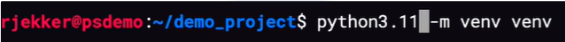

**`python3 -m venv myenv`**
* This will call the python module `venv` to create a new directory called **myenv** which will contain the virtual environment.
* The best practice is to create a virtual environment inside a project to manage all dependencies for that project in an isolated manner.
* You can also create a virtual environment for a specific python version by running the `venv` module with that version of the python.

## Activate a virtual environment

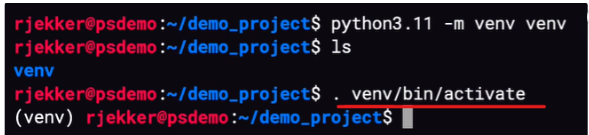

After creating the virtual environment, the next is to activate the virtual environment by running the **activate script**.

Once the virtual environment is activated, we can see the name of the virtual environment appear at the start of the prompt

**Linux/Mac OS**: `. venv/bin/activate`

**Windows**: `venv\Scripts\activate.bat`

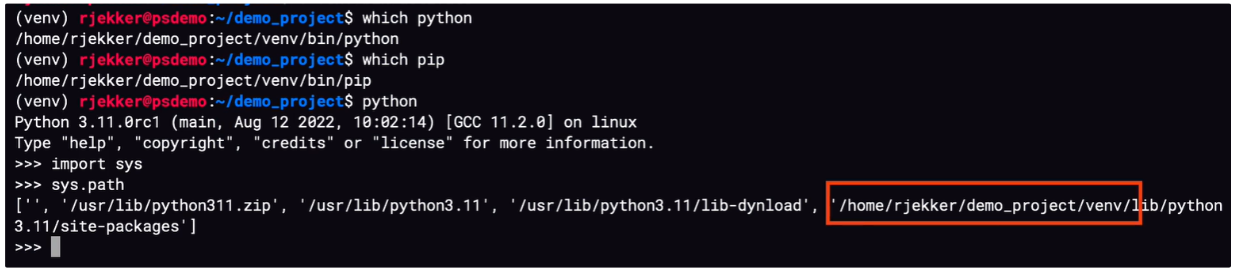

Activating the virtual environment sets up your shell so that the python interpreter and any package or dependencies installed in that environment are used instead of the globally installed ones.

For example, if we execute **which python** command inside the virtual environment, then it will show the python interpreter path present inside the virtual environment, instead of the global python.

Similarly, the **sys.path** variable is also modified to include the site-packages inside the virtual environment. 

And this ensures that any packages installed in the virtual environment are available for import.


## Anatomy of the virtual environment

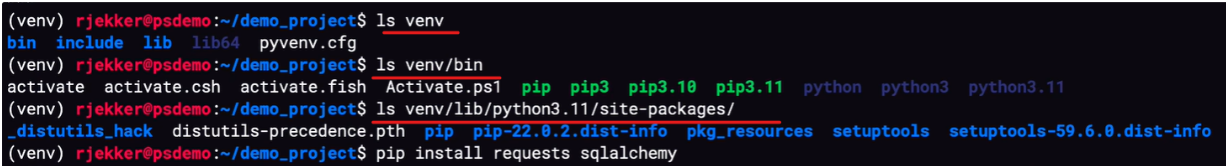

When we create a virtual environment, it creates a directory structure as shown in the image.

The `bin` directory contains the executable files for the virtual environment, such as the python interpreter, pip, activate & deactivate scripts.

If we install any packages then the executables for those packages will be placed in the `bin` folder.

The `lib` directory contains the site-packages folder which is where any third-party packages will be installed.

## Using the Requirement file to specify project dependencies

Suppose you’re working on a project and installing several packages such as `requests`, `sqlalchemy`, etc. 

When you share the project with your team through GitHub or Bitbucket, they will need these libraries to run that project.

**How do we make sure that the team knows which packages to install to run the project?**

We can do that using the Requirement file. 

It’s a text file that lists the dependencies of your project along with their versions.

**pip freeze**

`pip freeze > requirement.txt`

This will redirect the lists of packages along with their versions available in the virtual environment and store them in the `requirement.txt` file.

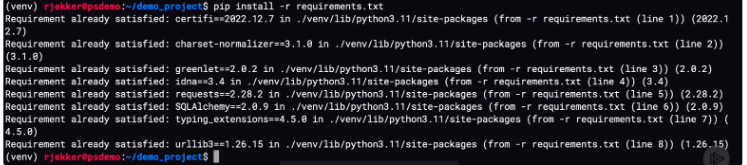

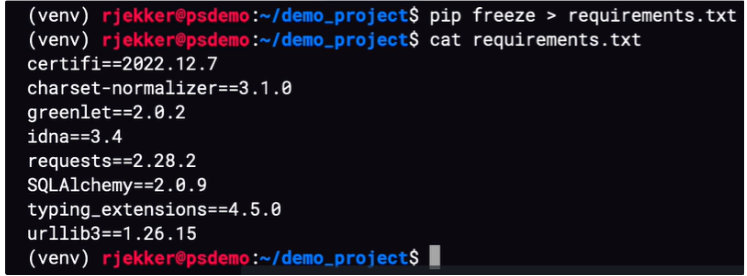

To install these dependencies, run →  **`pip install -r requirement.txt`** 

This would install all the packages listed in the `requirement.txt` file.

## Deactivate a virtual environment

Finally to leave the virtual environment, simply run the **deactivate** command and this will return back to the global python environment.

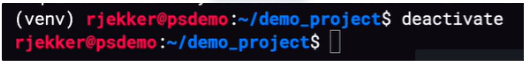

# Managing dependencies for applications

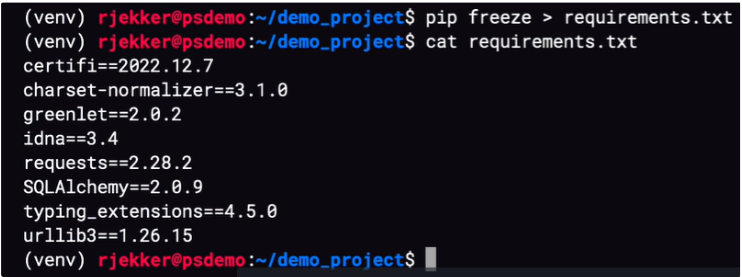

# Different requirement files for different environments

It’s common to have more than one requirement file. 
* Suppose the project or application uses some package for unit testing, say `pytest`.
* For debugging,  some debugging tool is required such as `flask-debugtoolbar`.

We probably don’t want all packages to be installed on the production systems.

To solve this problem, we create ***different requirements files for different environments***.

Here we are creating two requirements files, one for production and one for test.
* Production → `requirements-prod.txt`
* Test → `requirements-test.txt`



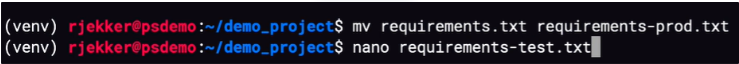

**requirements-prod.txt**: 
```
    requests==2.28.2`
```

**requirements-test.txt**
```
-r requirements-prod.txt
pytest==7.2.2
```

Here, first, we’re importing the `requirements-prod.txt` dependencies.

# Managing dependencies for custom libraries (packages)

The other kind of project that we can create is a library, and share it with others and the library will be executed in the user setup whoever is using it. 

This means we don’t have full control of the environment where the library will run.

In this case, we use `pyproject.toml` and don’t strictly specify the versions.

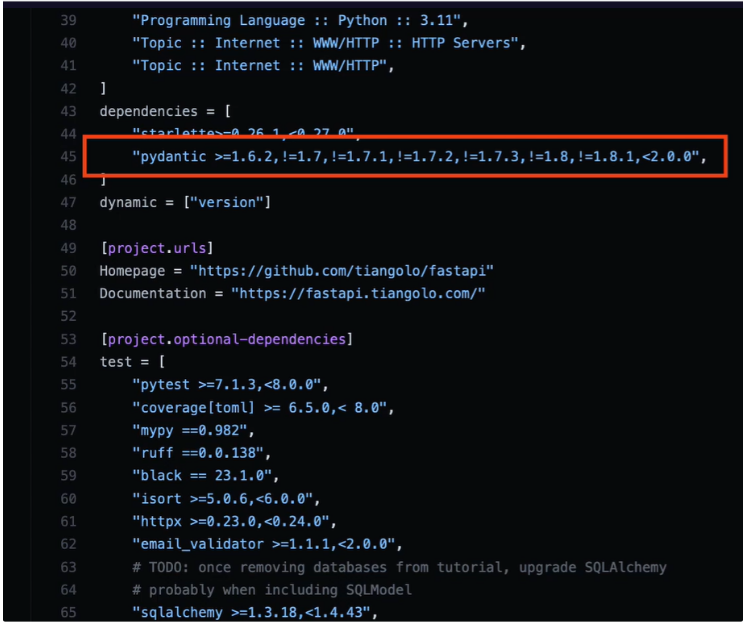


# Dependency resolution

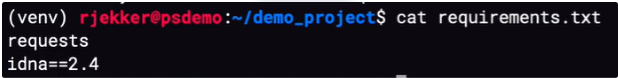

Earlier, we have seen whenever we’re not specifying the version, it means that we’re telling `pip` to get the latest version. But that is not exactly true.

As per the requirement mentioned above, there is no version specified for the `requests` package. 

So when we run the install command → `pip install -r requirements.txt`

It downloads the requests package a whole bunch of times and this is because the current latest version of requests package requires idna package version greater than `2.5`.

But since we have specified `idna` package version should be `2.4` in the `requirements.txt` file. So what `pip` does is that it keeps downloading older versions of requests package to see if there is a version which accepts `idna` package version `2.4`.

This process is called **Backtracking**. `Pip` downloads a version of **requests**, sees that it doesn’t support `idna` version `2.4`, and then it goes back a step and downloads the next older version of the `requests` package.

In a complex project, there will be multiple combinations of packages that need to be fulfilled.

So `pip` will have to search in a tree with lots of paths for a solution to this dependency puzzle.

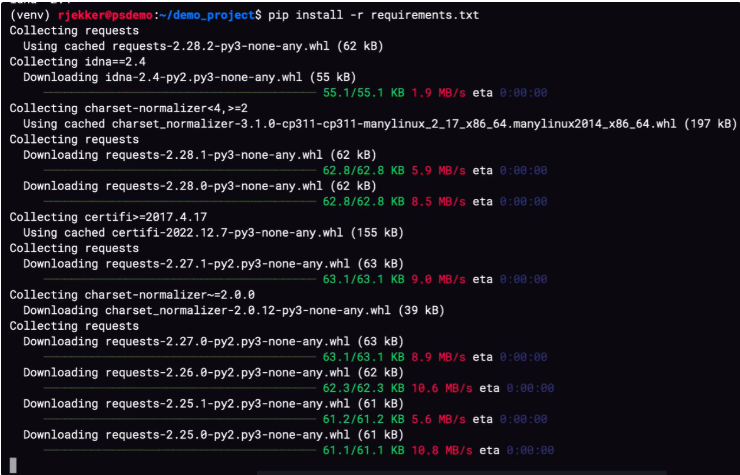

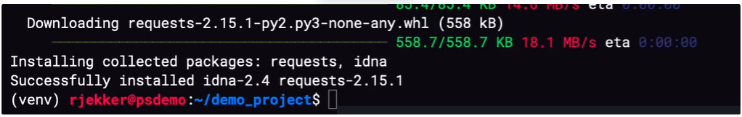

# Handling dependency conflicts

When `pip` cannot find a combination of packages that satisfies all the dependencies, we have a conflict there.

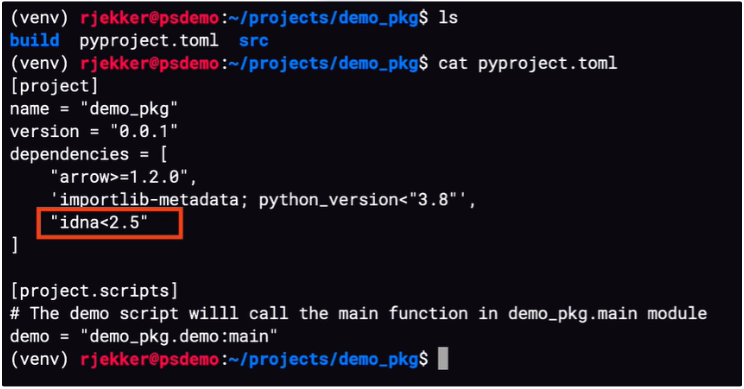

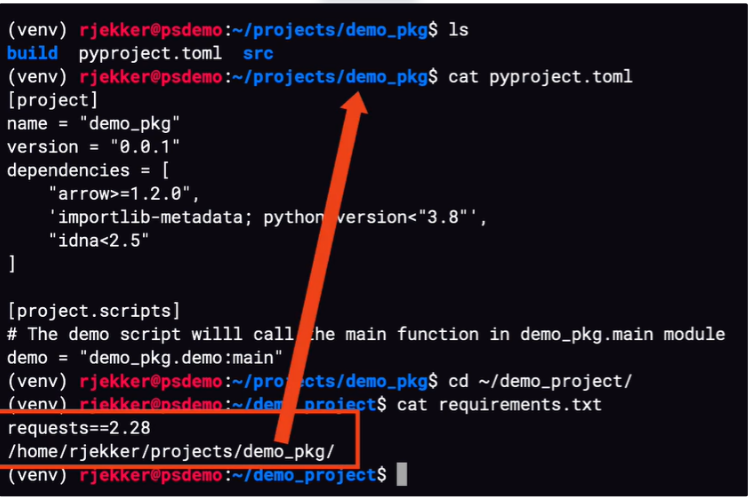

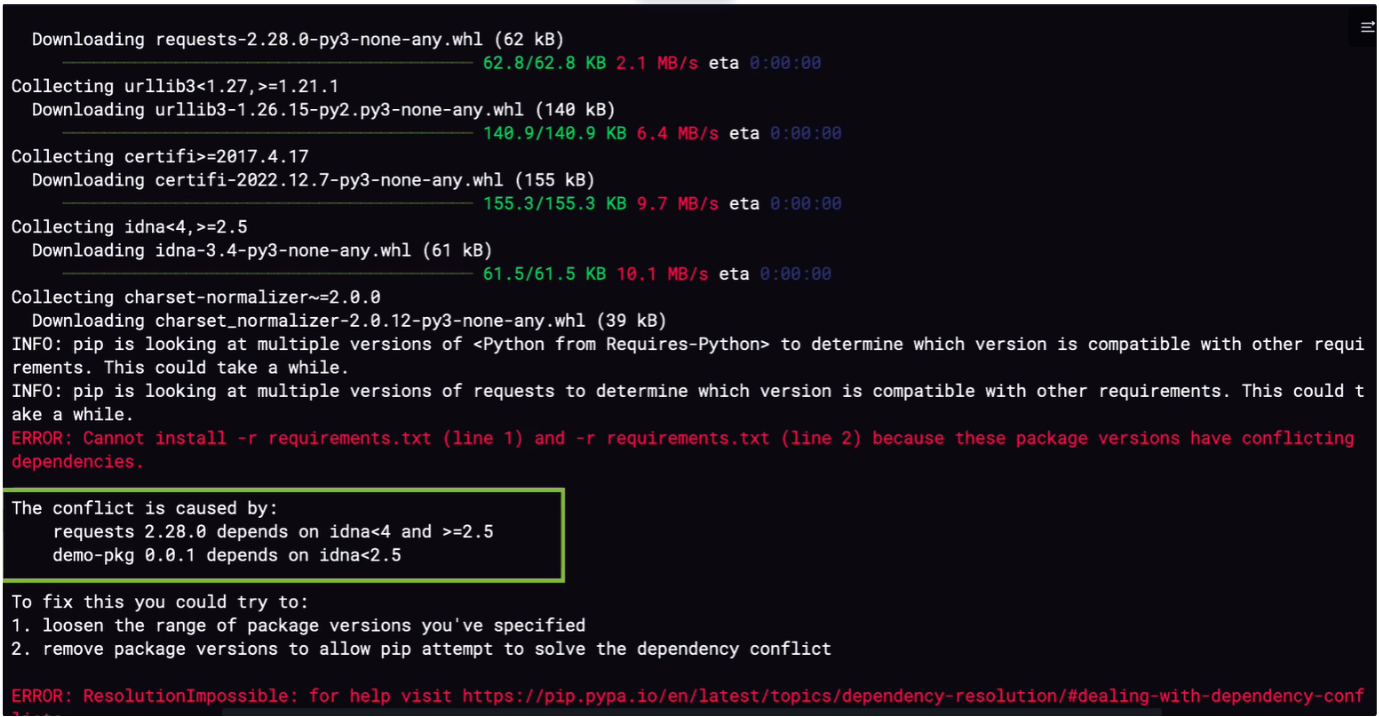